In [1]:
import sys,os,re
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sb


from itertools import product
from copy      import deepcopy
from time      import time

from scipy.interpolate import interp1d
from scipy.integrate   import trapz

import warnings
warnings.filterwarnings('ignore')

import matplotlib
from matplotlib import rc
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm

rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})

red    = '#8e001c'
yellow = '#ffb302'

sidelegend = {'bbox_to_anchor': (1.04,0.5), 
              'loc': "center left",
              'frameon': False}

In [2]:

#HERE YOU CHOOSE YOUR OBS YOU WANT TO EVALUATE THE APS 
use_obs  = ['GC','WL','GW']
#YOU SWITCH THIS ON IF YOU WANT SINGLE PLOTS FOR APS
single_plot=True

In [3]:
if 'GW' in use_obs:
    filename = './mock_data/LCDM_test_gal_GW_Cls_noiseless.dat'
    distributions = np.load('./mock_data/LCDM_test_gal_GW_source_distribution.npy',allow_pickle=True).item()
else:
    filename = './mock_data/LCDM_test_gal_Cls_noiseless.dat'
    distributions = np.load('./mock_data/LCDM_test_gal_source_distribution.npy',allow_pickle=True).item()

In [4]:
Nbins=0
if 'GC' in distributions:
    Nbins_gc=distributions['GC']['Nbins']
    Nbins=max(Nbins,Nbins_gc)
if 'WL' in distributions:
    Nbins_wl=distributions['WL']['Nbins']
    Nbins=max(Nbins,Nbins_wl)
if 'GW' in distributions:
    Nbins_gw=distributions['GW']['Nbins']
    Nbins=max(Nbins,Nbins_gw)


bincolors = sb.color_palette('crest',Nbins)

In [5]:

analysis_settings = {'Nbin_ell': 20,
                     'lmin': 10,
                     'lmax': 1500}

lmin = np.log10(analysis_settings['lmin'])
lmax = np.log10(analysis_settings['lmax'])
N    = analysis_settings['Nbin_ell']

ell_lims = np.logspace(lmin,lmax,N) 
ells     = np.array([int(ell) for ell in 0.5*(ell_lims[:-1]+ell_lims[1:])]) 

deltas   = (ell_lims[1:]-ell_lims[:-1])

In [6]:

Cls = pd.read_csv(filename, delim_whitespace=True)

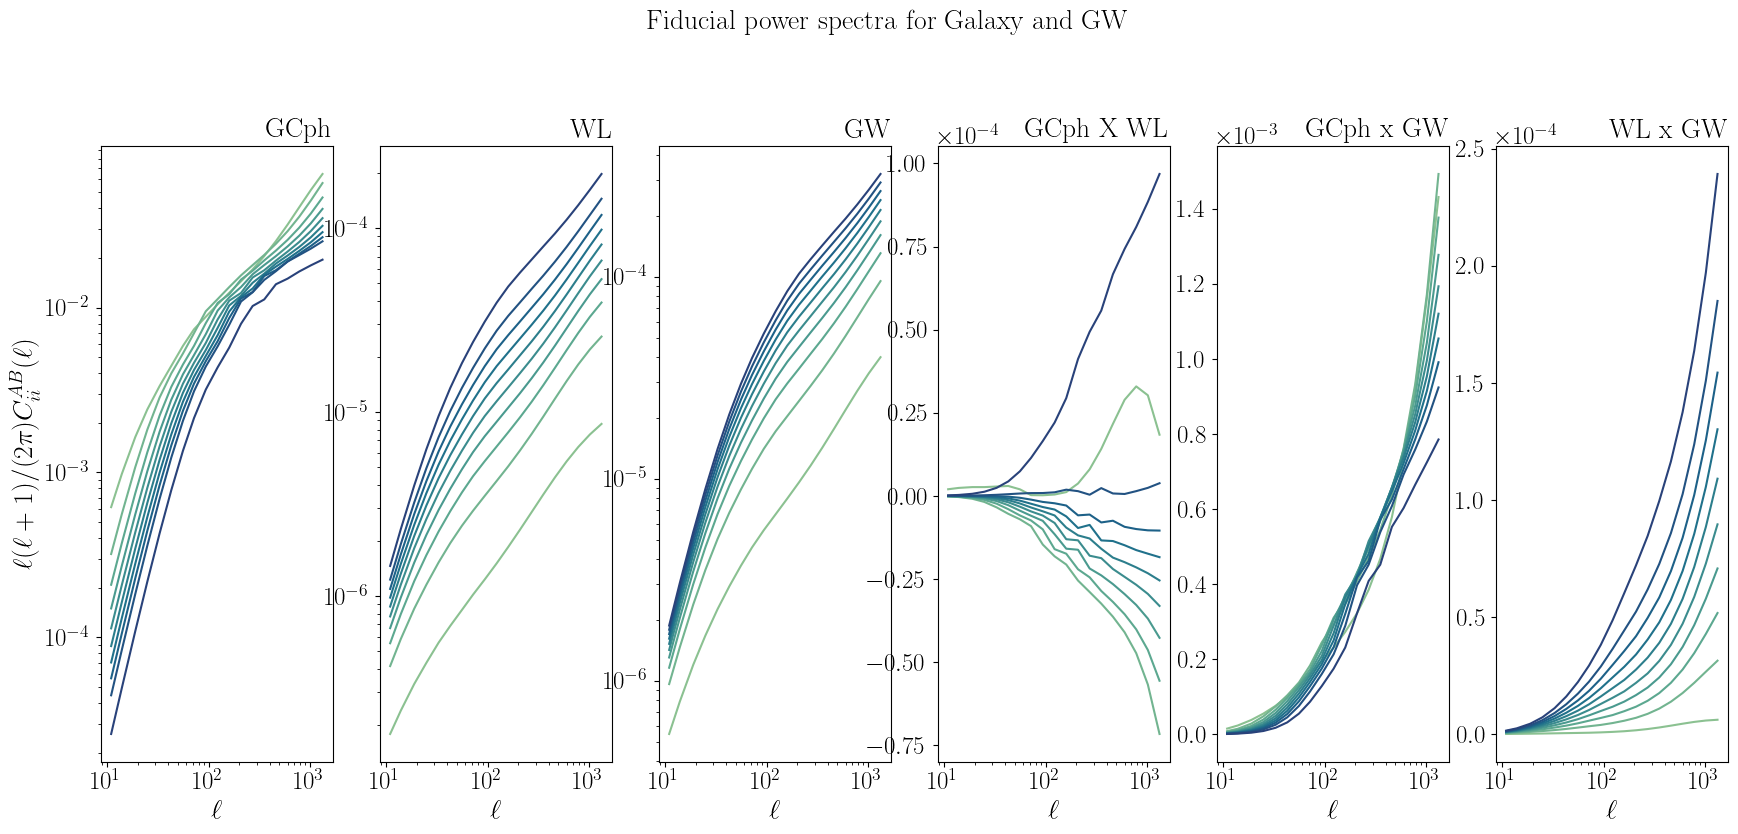

In [7]:
norm = ells*(ells+1)/(2*np.pi)
ells = Cls['ells']

if 'GC' in use_obs and 'WL' in use_obs and 'GW' in use_obs:
   
    fig, axes = plt.subplots(ncols=6, sharey=False, subplot_kw=dict(frameon=True), figsize=(21, 8))
    plt.suptitle('Fiducial power spectra for Galaxy and GW', y=1.05, fontsize=20, fontweight='bold')
    
    axis_label_fontsize = 20
    title_fontsize = 20
    title_fontweight = 'bold'
    
    axes[0].set_title('GCph', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[0].plot(ells, Cls['G{}xG{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axes[0].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    axes[1].set_title('WL', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[1].plot(ells, Cls['L{}xL{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axes[1].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    
    axes[2].set_title('GW', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[2].plot(ells, Cls['W{}xW{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axes[2].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[2].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[2].set_xscale('log')
    axes[2].set_yscale('log')
    
    axes[3].set_title('GCph X WL', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[3].plot(ells, Cls['G{}xL{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
       # axes[3].plot(ells, weyl_obs.Cls['G{}xL{}'.format(i, i)], color=bincolors[i - 1], ls=':')
    axes[3].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[3].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[3].set_xscale('log')
    
    axes[4].set_title('GCph x GW', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[4].plot(ells, Cls['G{}xW{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
        #axes[4].plot(ells, weyl_obs.Cls['G{}xW{}'.format(i, i)], color=bincolors[i - 1], ls=':')
    axes[4].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[4].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[4].set_xscale('log')
    
    axes[5].set_title('WL x GW', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[5].plot(ells, Cls['L{}xW{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
       # axes[5].plot(ells, weyl_obs.Cls['L{}xW{}'.format(i, i)], color=bincolors[i - 1], ls=':')
    axes[5].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[5].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[5].set_xscale('log')
    
    axes[0].set_ylabel(r'$\ell(\ell+1)/(2\pi)C_{ii}^{AB}(\ell)$', fontsize=axis_label_fontsize)
    plt.subplots_adjust(hspace=1.2)
    #axes[-1].legend(**sidelegend)
    
    

    plt.savefig('Cls.png', bbox_inches='tight');
    plt.show()


In [8]:
norm = ells*(ells+1)/(2*np.pi)
ells = Cls['ells']

if 'GC' in use_obs and 'WL' in use_obs and 'GW' not in use_obs:
   
    fig, axes = plt.subplots(ncols=3, sharey=False, subplot_kw=dict(frameon=True), figsize=(21, 8))
    plt.suptitle('Fiducial power spectra for Galaxy', y=1.05, fontsize=20, fontweight='bold')
    
    axis_label_fontsize = 20
    title_fontsize = 20
    title_fontweight = 'bold'
    
    axes[0].set_title('GCph', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[0].plot(ells, Cls['G{}xG{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axes[0].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    axes[1].set_title('WL', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[1].plot(ells, Cls['L{}xL{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axes[1].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    

    axes[2].set_title('GCph X WL', loc='right', fontdict={'fontsize': title_fontsize, 'fontweight': title_fontweight})
    for i in range(1, Nbins + 1):
        axes[2].plot(ells, Cls['G{}xL{}'.format(i, i)]*norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axes[2].set_xlabel(r'$\ell$', fontsize=axis_label_fontsize)
    axes[2].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    axes[2].set_xscale('log')
    
    axes[0].set_ylabel(r'$\ell(\ell+1)/(2\pi)C_{ii}^{AB}(\ell)$', fontsize=axis_label_fontsize)
    axes[-1].legend(**sidelegend)
    
    

    
    plt.show()


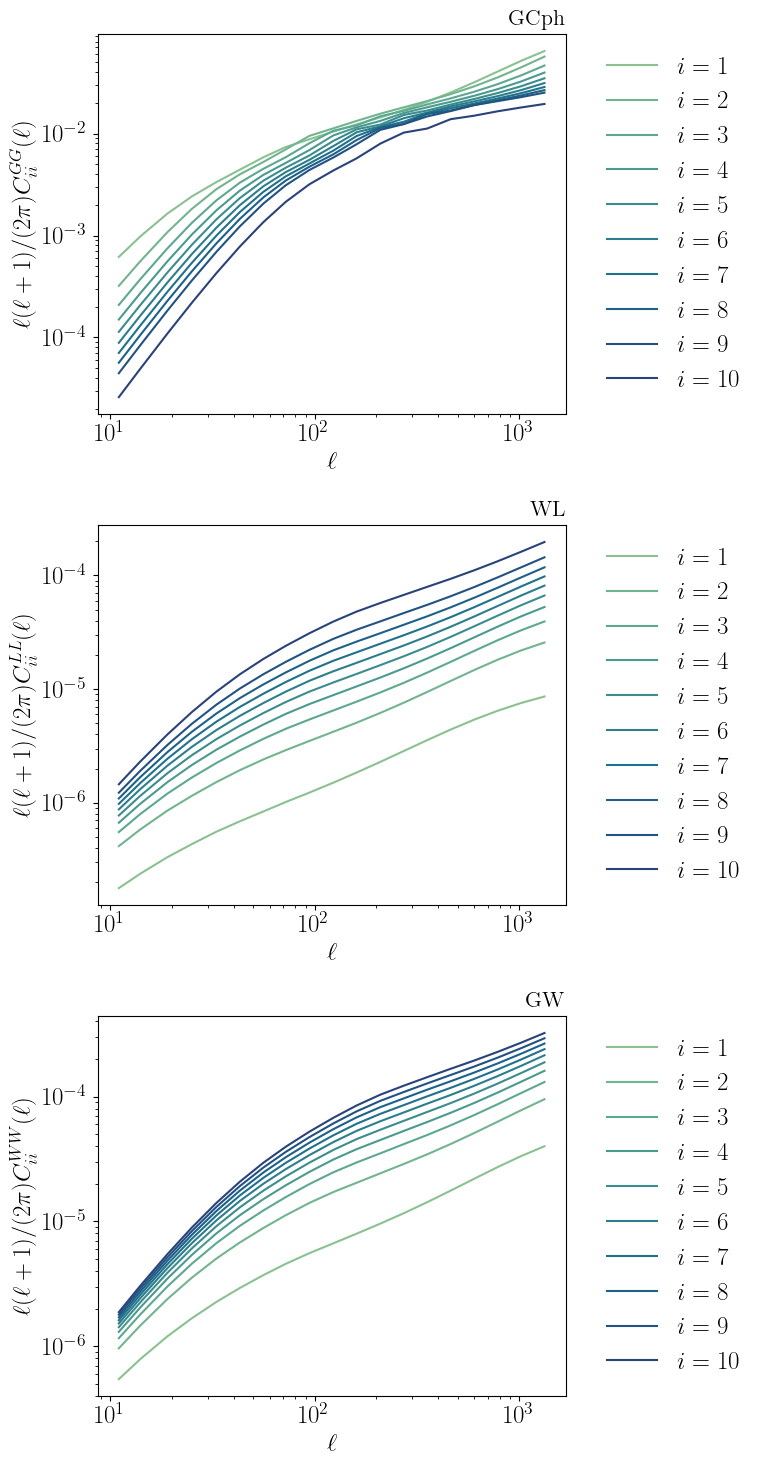

In [9]:
ells = Cls['ells']
norm = ells * (ells + 1) / (2 * np.pi)

# Create a figure with subplots for each observation type (GCph, WL, GW)
fig, axs = plt.subplots(3, 1, figsize=(8, 15))  # 3 rows, 1 column

if 'GC' in use_obs:
    axs[0].set_title('GCph', loc='right', fontdict={'fontsize': 16})
    for i in range(1, Nbins + 1):
        axs[0].plot(ells, Cls['G{}xG{}'.format(i, i)] * norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axs[0].set_xlabel(r'$\ell$')
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_ylabel(r'$\ell(\ell+1)/(2\pi)C_{ii}^{GG}(\ell)$')
    axs[0].legend(**sidelegend)

if 'WL' in use_obs:
    axs[1].set_title('WL', loc='right', fontdict={'fontsize': 16})
    for i in range(1, Nbins + 1):
        axs[1].plot(ells, Cls['L{}xL{}'.format(i, i)] * norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axs[1].set_xlabel(r'$\ell$')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_ylabel(r'$\ell(\ell+1)/(2\pi)C_{ii}^{LL}(\ell)$')
    axs[1].legend(**sidelegend)

if 'GW' in use_obs:
    axs[2].set_title('GW', loc='right', fontdict={'fontsize': 16})
    for i in range(1, Nbins + 1):
        axs[2].plot(ells, Cls['W{}xW{}'.format(i, i)] * norm, label=r'$i={}$'.format(i), color=bincolors[i - 1])
    axs[2].set_xlabel(r'$\ell$')
    axs[2].set_xscale('log')
    axs[2].set_yscale('log')
    axs[2].set_ylabel(r'$\ell(\ell+1)/(2\pi)C_{ii}^{WW}(\ell)$')
    axs[2].legend(**sidelegend)

# Adjust the layout
plt.tight_layout()
plt.show()

Text(-22.718828137161424, 0.5, '$\\ell(\\ell+1)/(2\\pi)C_{ii}^{WW}(\\ell)$')

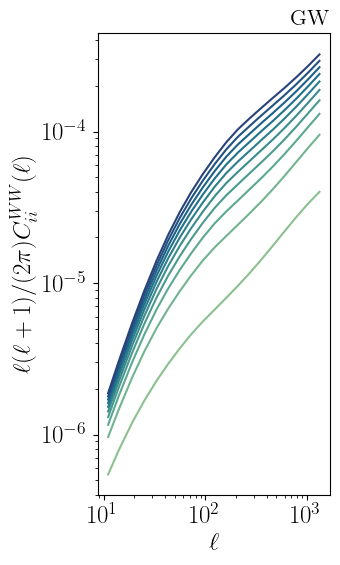

In [17]:
 
if 'GW' in use_obs:
    plt.figure(figsize=(3, 6)) 
    plt.title('GW',loc='right',fontdict={'fontsize':16})
    for i in range(1,Nbins_gc+1):
         plt.plot(ells,Cls['W{}xW{}'.format(i,i)]*norm,
                     label=r'$i={}$'.format(i),color=bincolors[i-1])
         #print((calc_obs_LCDM.Cls['G{}xG{}'.format(i,i)]-calc_obs_mu.Cls['G{}xG{}'.format(i,i)])/calc_obs_mu.Cls['G{}xG{}'.format(i,i)])
    plt.xlabel(r'$\ell$')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig('Cls_GW.png', bbox_inches='tight')

plt.ylabel(r'$\ell(\ell+1)/(2\pi)C_{ii}^{WW}(\ell)$')

